In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/Dataset/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-80-7bd70596471b>", line 1, in <module>
    get_ipython().magic('cd drive/MyDrive/Dataset/')
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-84>", line 2, in cd
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
FileNotFoundError: [Errno 2] No such file or directory

During handling of the above exce

FileNotFoundError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
trainData = pd.read_csv('train.csv')
trainLabel6 = pd.read_csv('train_6_buckets.csv')
trainLabel11 = pd.read_csv('train_11_buckets.csv')
trainLabel21 = pd.read_csv('train_21_buckets.csv')
testData = pd.read_csv('test.csv')
testLabel6 = pd.read_csv('test_6_buckets.csv')
testLabel11 = pd.read_csv('test_11_buckets.csv')
testLabel21 = pd.read_csv('test_21_buckets.csv')
valData = pd.read_csv('val.csv')
valLabel6 = pd.read_csv('valid_6_buckets.csv')
valLabel11 = pd.read_csv('valid_11_buckets.csv')
valLabel21 = pd.read_csv('valid_21_buckets.csv')
trainLabel21 *= 2
testLabel21 *= 2
valLabel21 *= 2
trainLabel6 /= 2
testLabel6 /= 2
valLabel6 /= 2

In [ ]:
print(trainLabel6.value_counts(), testLabel6.value_counts(), valLabel6.value_counts())

data_IMDBscore
6                 8264
8                 5560
4                 1289
2                  121
10                  13
dtype: int64 data_IMDBscore
6                 1787
8                 1161
4                  297
2                   21
10                   2
dtype: int64 data_IMDBscore
6                 1791
8                 1164
4                  280
2                   32
dtype: int64


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
trainLabel6 = np_utils.to_categorical(trainLabel6, 6).astype(np.int8)
trainLabel11 = np_utils.to_categorical(trainLabel11, 11).astype(np.int8)
trainLabel21 = np_utils.to_categorical(trainLabel21, 21).astype(np.int8)
testLabel6 = np_utils.to_categorical(testLabel6, 6).astype(np.int8)
testLabel11 = np_utils.to_categorical(testLabel11, 11).astype(np.int8)
testLabel21 = np_utils.to_categorical(testLabel21, 21).astype(np.int8)
valLabel6 = np_utils.to_categorical(valLabel6, 6).astype(np.int8)
valLabel11 = np_utils.to_categorical(valLabel11, 11).astype(np.int8)
valLabel21 = np_utils.to_categorical(valLabel21, 21).astype(np.int8)

In [ ]:
trainLabel6.shape, testLabel11.shape, valLabel21.shape, trainData.shape, testData.shape, valData.shape

((15247, 6), (3268, 11), (3267, 21), (15247, 3561), (3268, 3561), (3267, 3561))

In [ ]:
trainVals= np.array(trainData)
testVals = np.array(testData)
valVals = np.array(valData)

In [ ]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=3561))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=True)
hist = model.fit(trainVals, trainLabel6, batch_size=128, epochs=150, validation_data=(valVals, valLabel6), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_137 (Dense)           (None, 500)               1781000   
                                                                 
 dense_138 (Dense)           (None, 500)               250500    
                                                                 
 dense_139 (Dense)           (None, 250)               125250    
                                                                 
 dense_140 (Dense)           (None, 125)               31375     
                                                                 
 dense_141 (Dense)           (None, 6)                 756       
                                                                 
Total params: 2,188,881
Trainable params: 2,188,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
119/120 [======================

In [ ]:
plt.style.use('seaborn')

In [ ]:
model = Sequential()
model.add(Dense(250, activation='relu', input_dim=3561))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=True)
hist = model.fit(trainVals, trainLabel6, batch_size=128, epochs=150, validation_data=(valVals, valLabel6), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 250)               890500    
                                                                 
 dropout_54 (Dropout)        (None, 250)               0         
                                                                 
 dense_167 (Dense)           (None, 500)               125500    
                                                                 
 dropout_55 (Dropout)        (None, 500)               0         
                                                                 
 dense_168 (Dense)           (None, 500)               250500    
                                                                 
 dropout_56 (Dropout)        (None, 500)               0         
                                                                 
 dense_169 (Dense)           (None, 200)             

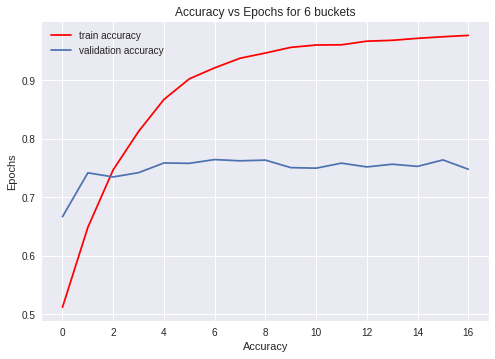

In [ ]:
plt.plot(hist.history['accuracy'], label='train accuracy', c='red')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()
plt.title('Accuracy vs Epochs for 6 buckets')
plt.show()

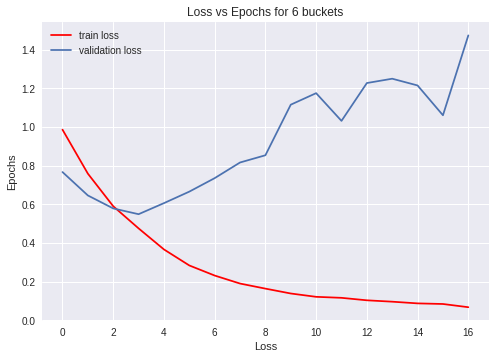

In [ ]:
plt.plot(hist.history['loss'], label='train loss', c='red')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.title('Loss vs Epochs for 6 buckets')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel6)

103/103 [==============================] - 1s 6ms/step - loss: 0.7069 - accuracy: 0.7760


[0.7069114446640015, 0.7760097980499268]

In [ ]:
preds = model.predict(testVals)

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
finalLabels = np.argmax(testLabel6, axis=1)

In [ ]:
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.72      0.64      0.68       297
           3       0.79      0.82      0.81      1787
           4       0.77      0.75      0.76      1161
           5       0.00      0.00      0.00         2

    accuracy                           0.78      3268
   macro avg       0.46      0.44      0.45      3268
weighted avg       0.77      0.78      0.77      3268



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
preds = model.predict(trainVals)

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
finalLabels = np.argmax(trainLabel6, axis=1)

In [ ]:
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       121
           2       0.90      0.99      0.95      1289
           3       0.99      0.99      0.99      8264
           4       0.99      0.98      0.99      5560
           5       0.00      0.00      0.00        13

    accuracy                           0.98     15247
   macro avg       0.58      0.59      0.58     15247
weighted avg       0.97      0.98      0.98     15247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
preds = model.predict(valVals)

In [ ]:
preds = model.predict(valVals)

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
finalLabels = np.argmax(valLabel6, axis=1)

In [ ]:
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.69      0.61      0.65       280
           3       0.77      0.84      0.80      1791
           4       0.77      0.71      0.74      1164

    accuracy                           0.76      3267
   macro avg       0.56      0.54      0.55      3267
weighted avg       0.76      0.76      0.76      3267



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


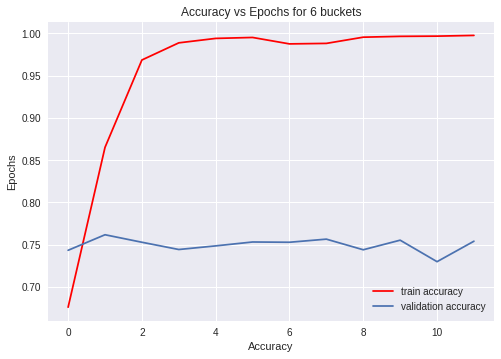

In [ ]:
plt.plot(hist.history['accuracy'], label='train accuracy', c='red')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()
plt.title('Accuracy vs Epochs for 6 buckets')
plt.show()

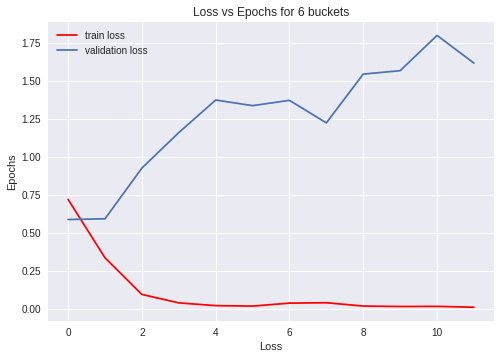

In [ ]:
plt.plot(hist.history['loss'], label='train loss', c='red')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.title('Loss vs Epochs for 6 buckets')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel6)

103/103 [==============================] - 1s 8ms/step - loss: 0.5673 - accuracy: 0.7674


[0.5672906041145325, 0.7674418687820435]

In [ ]:
preds = model.predict(testVals)

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
finalLabels = np.argmax(testLabel6, axis=1)

In [ ]:
preds[0], testLabel6[0], finalLabels[0]

(3, array([0, 0, 0, 1, 0, 0], dtype=int8), 3)

In [ ]:
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           1       0.80      0.19      0.31        21
           2       0.75      0.55      0.64       297
           3       0.79      0.80      0.79      1787
           4       0.74      0.79      0.76      1161
           5       0.00      0.00      0.00         2

    accuracy                           0.77      3268
   macro avg       0.62      0.47      0.50      3268
weighted avg       0.77      0.77      0.76      3268



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=3561))
# model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=True)
model.fit(trainVals, trainLabel6, batch_size=128, epochs=150, validation_data=(valVals, valLabel6), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 500)               1781000   
                                                                 
 dense_16 (Dense)            (None, 250)               125250    
                                                                 
 dense_17 (Dense)            (None, 125)               31375     
                                                                 
 dense_18 (Dense)            (None, 60)                7560      
                                                                 
 dense_19 (Dense)            (None, 30)                1830      
                                                                 
 dense_20 (Dense)            (None, 15)                465       
                                                                 
 dense_21 (Dense)            (None, 6)                

In [ ]:
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel6)

103/103 [==============================] - 1s 6ms/step - loss: 1.2546 - accuracy: 0.7476


[1.2545723915100098, 0.7475520372390747]

In [ ]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=3561))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=True)
model.fit(trainVals, trainLabel6, batch_size=128, epochs=150, validation_data=(valVals, valLabel6), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 500)               1781000   
                                                                 
 dense_31 (Dense)            (None, 500)               250500    
                                                                 
 dense_32 (Dense)            (None, 250)               125250    
                                                                 
 dense_33 (Dense)            (None, 125)               31375     
                                                                 
 dense_34 (Dense)            (None, 60)                7560      
                                                                 
 dense_35 (Dense)            (None, 30)                1830      
                                                                 
 dense_36 (Dense)            (None, 15)               

In [ ]:
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel6)

103/103 [==============================] - 1s 7ms/step - loss: 0.5924 - accuracy: 0.7521


[0.5923585295677185, 0.7521420121192932]

In [ ]:
model = Sequential()
model.add(Dense(250, activation='relu', input_dim=3561))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(80, activation='relu'))
# model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=True)
model.fit(trainVals, trainLabel6, batch_size=128, epochs=150, validation_data=(valVals, valLabel6), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 250)               890500    
                                                                 
 dense_39 (Dense)            (None, 500)               125500    
                                                                 
 dense_40 (Dense)            (None, 500)               250500    
                                                                 
 dense_41 (Dense)            (None, 200)               100200    
                                                                 
 dense_42 (Dense)            (None, 80)                16080     
                                                                 
 dense_43 (Dense)            (None, 20)                1620      
                                                                 
 dense_44 (Dense)            (None, 6)                

In [ ]:
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel6)

103/103 [==============================] - 1s 6ms/step - loss: 1.1142 - accuracy: 0.7604


[1.1142010688781738, 0.7604039311408997]

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=3561))
# model.add(Dense(500, activation='relu'))
# model.add(Dense(500, activation='relu'))
# model.add(Dense(200, activation='relu'))
# model.add(Dense(80, activation='relu'))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=True)
model.fit(trainVals, trainLabel6, batch_size=128, epochs=150, validation_data=(valVals, valLabel6), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 100)               356200    
                                                                 
 dense_46 (Dense)            (None, 6)                 606       
                                                                 
Total params: 356,806
Trainable params: 356,806
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
116/120 [============================>.] - ETA: 0s - loss: 0.8962 - accuracy: 0.6245
Epoch 00001: val_loss improved from inf to 0.73194, saving model to bestModelValLoss.h5

Epoch 00001: val_accuracy improved from -inf to 0.67218, saving model to bestModelValAcc.h5
120/120 [==============================] - 7s 56ms/step - loss: 0.8911 - accuracy: 0.6258 - val_loss: 0.7319 - val_accuracy: 0.6722
Epoch 2/150
118/120 [=============

In [ ]:
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel6)

103/103 [==============================] - 0s 3ms/step - loss: 0.8579 - accuracy: 0.7160


[0.8578686118125916, 0.7160342931747437]

In [ ]:
model = Sequential()

model.add(Dense(250, activation='relu', input_dim=3561))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=True)
model.fit(trainVals, trainLabel6, batch_size=128, epochs=150, validation_data=(valVals, valLabel6), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 250)               890500    
                                                                 
 dense_60 (Dense)            (None, 500)               125500    
                                                                 
 dense_61 (Dense)            (None, 500)               250500    
                                                                 
 dense_62 (Dense)            (None, 250)               125250    
                                                                 
 dense_63 (Dense)            (None, 125)               31375     
                                                                 
 dense_64 (Dense)            (None, 6)                 756       
                                                                 
Total params: 1,423,881
Trainable params: 1,423,881
N

In [ ]:
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel6)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel6)

103/103 [==============================] - 1s 6ms/step - loss: 1.5413 - accuracy: 0.7558


[1.5413442850112915, 0.7558139562606812]

In [ ]:
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(250, activation='relu', input_dim=3561))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=True)
hist = model.fit(trainVals, trainLabel11, batch_size=128, epochs=150, validation_data=(valVals, valLabel11), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 250)               890500    
                                                                 
 dropout_39 (Dropout)        (None, 250)               0         
                                                                 
 dense_149 (Dense)           (None, 500)               125500    
                                                                 
 dropout_40 (Dropout)        (None, 500)               0         
                                                                 
 dense_150 (Dense)           (None, 500)               250500    
                                                                 
 dropout_41 (Dropout)        (None, 500)               0         
                                                                 
 dense_151 (Dense)           (None, 200)             

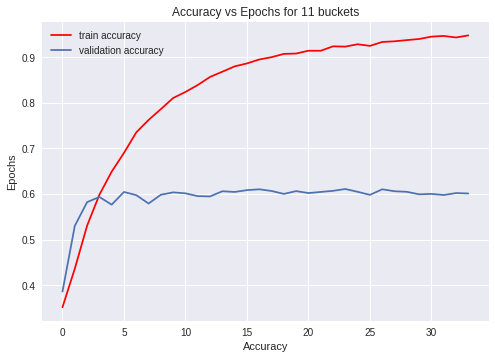

In [ ]:
plt.plot(hist.history['accuracy'], label='train accuracy', c='red')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()
plt.title('Accuracy vs Epochs for 11 buckets')
plt.show()

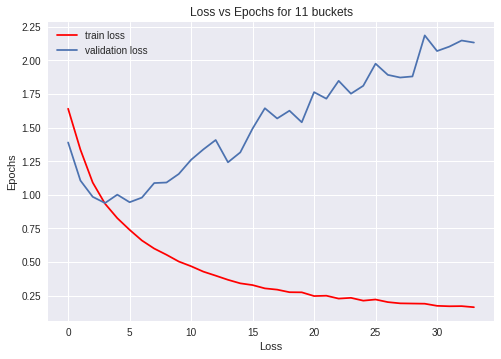

In [ ]:
plt.plot(hist.history['loss'], label='train loss', c='red')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.title('Loss vs Epochs for 11 buckets')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
model.evaluate(testVals, testLabel11)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel11)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel11)

103/103 [==============================] - 1s 7ms/step - loss: 1.7201 - accuracy: 0.6126


[1.7200676202774048, 0.6126071214675903]

In [ ]:
preds = model.predict(testVals)

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
finalLabels = np.argmax(testLabel11, axis=1)

In [ ]:
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         6
           3       0.64      0.20      0.31        45
           4       0.53      0.33      0.41       131
           5       0.54      0.45      0.49       345
           6       0.59      0.71      0.64       930
           7       0.64      0.70      0.67      1261
           8       0.68      0.45      0.54       533
           9       0.20      0.12      0.15        16
          10       0.00      0.00      0.00         1

    accuracy                           0.61      3268
   macro avg       0.42      0.33      0.36      3268
weighted avg       0.61      0.61      0.60      3268



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
preds = model.predict(trainVals)

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
finalLabels = np.argmax(trainLabel11, axis=1)

In [ ]:
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        55
           3       0.71      0.91      0.80       197
           4       0.96      0.95      0.95       527
           5       0.99      1.00      1.00      1649
           6       0.99      1.00      1.00      4234
           7       1.00      1.00      1.00      6035
           8       1.00      1.00      1.00      2429
           9       0.96      0.98      0.97       119
          10       0.00      0.00      0.00         1

    accuracy                           0.99     15247
   macro avg       0.66      0.68      0.67     15247
weighted avg       0.99      0.99      0.99     15247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
preds = model.predict(valVals)

In [ ]:
preds = model.predict(valVals)

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
finalLabels = np.argmax(valLabel11, axis=1)

In [ ]:
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        11
           3       0.50      0.16      0.24        50
           4       0.45      0.36      0.40       108
           5       0.61      0.43      0.50       376
           6       0.58      0.76      0.65       914
           7       0.65      0.68      0.67      1253
           8       0.64      0.45      0.53       529
           9       0.29      0.08      0.12        25

    accuracy                           0.61      3267
   macro avg       0.41      0.32      0.35      3267
weighted avg       0.61      0.61      0.60      3267



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
finalLabels = np.argmax(testLabel6, axis=1)

In [ ]:
preds[0], testLabel6[0], finalLabels[0]

(3, array([0, 0, 0, 1, 0, 0], dtype=int8), 3)

In [ ]:
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           1       0.80      0.19      0.31        21
           2       0.75      0.55      0.64       297
           3       0.79      0.80      0.79      1787
           4       0.74      0.79      0.76      1161
           5       0.00      0.00      0.00         2

    accuracy                           0.77      3268
   macro avg       0.62      0.47      0.50      3268
weighted avg       0.77      0.77      0.76      3268



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.evaluate(testVals, testLabel11)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel11)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel11)

103/103 [==============================] - 1s 6ms/step - loss: 1.1883 - accuracy: 0.6215


[1.1883244514465332, 0.6214810013771057]

In [ ]:
model = Sequential()
model.add(Dense(250, activation='relu', input_dim=3561))
model.add(Dropout(0.5))
# model.add(Dense(500, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(500, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(125, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=True)
model.fit(trainVals, trainLabel11, batch_size=128, epochs=150, validation_data=(valVals, valLabel11), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 250)               890500    
                                                                 
 dropout_5 (Dropout)         (None, 250)               0         
                                                                 
 dense_79 (Dense)            (None, 125)               31375     
                                                                 
 dropout_6 (Dropout)         (None, 125)               0         
                                                                 
 dense_80 (Dense)            (None, 50)                6300      
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_81 (Dense)            (None, 11)              

In [ ]:
model.evaluate(testVals, testLabel11)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel11)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel11)

103/103 [==============================] - 1s 5ms/step - loss: 1.4475 - accuracy: 0.5982


[1.4474501609802246, 0.5982252359390259]

In [ ]:
model = Sequential()
model.add(Dense(250, activation='relu', input_dim=3561))
# model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(80, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=True)
model.fit(trainVals, trainLabel11, batch_size=128, epochs=150, validation_data=(valVals, valLabel11), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 250)               890500    
                                                                 
 dense_83 (Dense)            (None, 500)               125500    
                                                                 
 dense_84 (Dense)            (None, 500)               250500    
                                                                 
 dense_85 (Dense)            (None, 200)               100200    
                                                                 
 dense_86 (Dense)            (None, 80)                16080     
                                                                 
 dense_87 (Dense)            (None, 30)                2430      
                                                                 
 dense_88 (Dense)            (None, 20)              

In [ ]:
model.evaluate(testVals, testLabel11)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel11)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel11)

103/103 [==============================] - 1s 8ms/step - loss: 1.9047 - accuracy: 0.6279


[1.9046964645385742, 0.6279069781303406]

In [ ]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=3561))
# model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(80, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=True)
model.fit(trainVals, trainLabel11, batch_size=128, epochs=150, validation_data=(valVals, valLabel11), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 1000)              3562000   
                                                                 
 dense_91 (Dense)            (None, 500)               500500    
                                                                 
 dense_92 (Dense)            (None, 500)               250500    
                                                                 
 dense_93 (Dense)            (None, 200)               100200    
                                                                 
 dense_94 (Dense)            (None, 80)                16080     
                                                                 
 dense_95 (Dense)            (None, 30)                2430      
                                                                 
 dense_96 (Dense)            (None, 20)              

In [ ]:
model.evaluate(testVals, testLabel11)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel11)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel11)

103/103 [==============================] - 1s 11ms/step - loss: 1.7382 - accuracy: 0.6056


[1.7381625175476074, 0.6055691838264465]

In [ ]:
model = Sequential()
model.add(Dense(250, activation='relu', input_dim=3561))
model.add(Dropout(0.4))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(80, activation='relu'))
# model.add(Dropout(0.8))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=True)
model.fit(trainVals, trainLabel11, batch_size=128, epochs=150, validation_data=(valVals, valLabel11), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 250)               890500    
                                                                 
 dropout_18 (Dropout)        (None, 250)               0         
                                                                 
 dense_114 (Dense)           (None, 500)               125500    
                                                                 
 dropout_19 (Dropout)        (None, 500)               0         
                                                                 
 dense_115 (Dense)           (None, 500)               250500    
                                                                 
 dropout_20 (Dropout)        (None, 500)               0         
                                                                 
 dense_116 (Dense)           (None, 200)             

In [ ]:
model.evaluate(testVals, testLabel11)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel11)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel11)

103/103 [==============================] - 1s 7ms/step - loss: 1.1779 - accuracy: 0.6166


[1.177890419960022, 0.6165850758552551]

In [ ]:
model = Sequential()
model.add(Dense(250, activation='relu', input_dim=3561))
model.add(Dropout(0.4))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(80, activation='relu'))
# model.add(Dropout(0.8))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(21, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkPointLoss = ModelCheckpoint('bestModelValLoss.h5', monitor='val_loss', verbose=True, save_best_only=True)
checkPointAcc = ModelCheckpoint('bestModelValAcc.h5', monitor='val_accuracy', verbose=True, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=True)
hist = model.fit(trainVals, trainLabel21, batch_size=128, epochs=150, validation_data=(valVals, valLabel21), callbacks=[checkPointLoss, checkPointAcc, earlyStopping])

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_178 (Dense)           (None, 250)               890500    
                                                                 
 dropout_63 (Dropout)        (None, 250)               0         
                                                                 
 dense_179 (Dense)           (None, 500)               125500    
                                                                 
 dropout_64 (Dropout)        (None, 500)               0         
                                                                 
 dense_180 (Dense)           (None, 500)               250500    
                                                                 
 dropout_65 (Dropout)        (None, 500)               0         
                                                                 
 dense_181 (Dense)           (None, 200)             

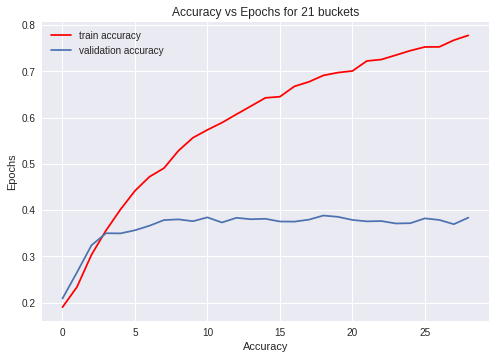

In [ ]:
plt.plot(hist.history['accuracy'], label='train accuracy', c='red')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()
plt.title('Accuracy vs Epochs for 21 buckets')
plt.show()

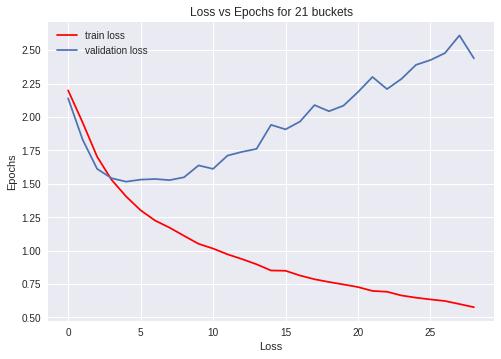

In [ ]:
plt.plot(hist.history['loss'], label='train loss', c='red')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.title('Loss vs Epochs for 21 buckets')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
model.evaluate(testVals, testLabel21)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel21)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel21)

103/103 [==============================] - 1s 7ms/step - loss: 2.0213 - accuracy: 0.3877


[2.0212581157684326, 0.3876988887786865]

In [ ]:
preds = model.predict(testVals)

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
finalLabels = np.argmax(testLabel21, axis=1)

In [ ]:
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        21
           7       0.27      0.18      0.21        45
           8       0.16      0.07      0.09        60
           9       0.27      0.28      0.28       109
          10       0.33      0.23      0.27       177
          11       0.39      0.45      0.42       329
          12       0.36      0.50      0.42       457
          13       0.38      0.40      0.39       624
          14       0.43      0.45      0.44       667
          15       0.46      0.37      0.41       495
          16       0.37      0.34      0.36       226
          17       0.13      0.05      0.08        38
          18       1.00      0.25      0.40         4
          19       0.00      0.00      0.00         2

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
preds = model.predict(trainVals)

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
finalLabels = np.argmax(trainLabel21, axis=1)

In [ ]:
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00        55
           6       0.38      0.03      0.06        98
           7       0.40      0.91      0.56       162
           8       0.79      0.47      0.59       272
           9       0.69      0.85      0.76       490
          10       0.80      0.80      0.80       840
          11       0.77      0.91      0.83      1408
          12       0.86      0.86      0.86      2178
          13       0.94      0.90      0.92      2973
          14       0.98      0.94      0.96      3103
          15       0.97      0.85      0.91      2299
          16       0.73      0.98      0.84      1059
          17       0.78      0.72      0.75       239
          18       0.75      0.10      0.17        31
          19       0.00      0.00      0.00         2

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
preds = model.predict(valVals)

In [ ]:
preds = model.predict(valVals)

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
finalLabels = np.argmax(valLabel21, axis=1)

In [ ]:
cr = classification_report(finalLabels, preds)
print(cr)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        26
           7       0.09      0.07      0.08        42
           8       0.15      0.05      0.07        60
           9       0.28      0.30      0.29       100
          10       0.35      0.28      0.31       178
          11       0.35      0.45      0.40       306
          12       0.39      0.50      0.44       485
          13       0.39      0.41      0.40       621
          14       0.43      0.43      0.43       673
          15       0.40      0.36      0.38       450
          16       0.45      0.37      0.41       247
          17       0.33      0.07      0.12        55
          18       0.00      0.00      0.00         3

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.evaluate(testVals, testLabel21)
model.load_weights('bestModelValLoss.h5')
model.evaluate(testVals, testLabel21)
model.load_weights('bestModelValAcc.h5')
model.evaluate(testVals, testLabel21)

103/103 [==============================] - 1s 6ms/step - loss: 2.0213 - accuracy: 0.3877


[2.0212581157684326, 0.3876988887786865]

In [ ]:
trainData = pd.read_csv('train.csv')
trainLabel6 = pd.read_csv('train_6_buckets.csv')
trainLabel11 = pd.read_csv('train_11_buckets.csv')
trainLabel21 = pd.read_csv('train_21_buckets.csv')
testData = pd.read_csv('test.csv')
testLabel6 = pd.read_csv('test_6_buckets.csv')
testLabel11 = pd.read_csv('test_11_buckets.csv')
testLabel21 = pd.read_csv('test_21_buckets.csv')
valData = pd.read_csv('val.csv')
valLabel6 = pd.read_csv('valid_6_buckets.csv')
valLabel11 = pd.read_csv('valid_11_buckets.csv')
valLabel21 = pd.read_csv('valid_21_buckets.csv')
trainLabel21 *= 2
testLabel21 *= 2
valLabel21 *= 2

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
C = [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10, 20]

In [ ]:
for c in C:
    print(c)
    SVM = LinearSVC(C=c, verbose=False)
    SVM.fit(trainData, trainLabel11)
    print('train', SVM.score(trainData, trainLabel11))
    print('test', SVM.score(testData, testLabel11))
    print('val', SVM.score(valData, valLabel11))

0.1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train 0.8414770118711877
test 0.545593635250918
val 0.5445362718089991
0.2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train 0.8586607201416672
test 0.5315177478580171
val 0.5393327211509029
0.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train 0.8663999475306617
test 0.5263157894736842
val 0.5344352617079889
0.4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train 0.8713189479897685
test 0.5241738066095472
val 0.5353535353535354
0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train 0.8751885616842657
test 0.5238678090575275
val 0.5374961738598102
1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train 0.8849609759296911
test 0.5137698898408812
val 0.5350474441383533
2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train 0.8920443365908047
test 0.5113219094247246
val 0.5224977043158862
3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train 0.8934216567193546
test 0.5079559363525091
val 0.5194367921640649
4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train 0.8869941627861219
test 0.5061199510403916
val 0.5188246097337006
5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train 0.8961762969764544
test 0.5048959608323134
val 0.5218855218855218
10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train 0.8610874270348265
test 0.4865361077111383
val 0.4970921334557698
20


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


train 0.8427231586541615
test 0.5015299877600979
val 0.5059687786960514


In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [ ]:
SVM = svm.SVC(C=1.0, kernel='poly', max_iter=2000, verbose=True)
SVM.fit(trainData, trainLabel6)
print('train', SVM.score(trainData, trainLabel6))
print('test', SVM.score(testData, testLabel6))
print('val', SVM.score(valData, valLabel6))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


train 0.9919984259198531
test 0.9785801713586292
val 0.9761248852157943


In [ ]:
SVM = svm.SVC(C=1.0, kernel='poly', max_iter=2000, verbose=True)
SVM.fit(trainData, trainLabel6)
trainpred = SVM.predict(trainData)
valpred = SVM.predict(valData)
testpred = SVM.predict(testData)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
train_f1_score = f1_score(trainLabel6, trainpred, average='weighted')
train_precision_score = precision_score(trainLabel6, trainpred, average='weighted')
train_recall_score = recall_score(trainLabel6, trainpred, average='weighted')
train_accuracy_score = accuracy_score(trainLabel6, trainpred, normalize=True)

val_f1_score = f1_score(valLabel6, valpred, average='weighted')
val_precision_score = precision_score(valLabel6, valpred, average='weighted')
val_recall_score = recall_score(valLabel6, valpred, average='weighted')
val_accuracy_score = accuracy_score(valLabel6, valpred, normalize=True)

test_f1_score = f1_score(testLabel6, testpred, average='weighted')
test_precision_score = precision_score(testLabel6, testpred, average='weighted')
test_recall_score = recall_score(testLabel6, testpred, average='weighted')
test_accuracy_score = accuracy_score(testLabel6, testpred, normalize=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision 

In [ ]:
modelSet = ['train', 'test', 'val']
metricType = ['f1', 'precision', 'recall', 'accuracy']

In [ ]:
print(train_f1_score,train_precision_score,train_recall_score,train_accuracy_score)

0.988208322039349 0.9847434779914342 0.9919984259198531 0.9919984259198531


In [ ]:
print(test_f1_score,test_precision_score,test_recall_score,test_accuracy_score)

0.9753093762684168 0.9720696523707206 0.9785801713586292 0.9785801713586292


In [ ]:
print(val_f1_score,val_precision_score,val_recall_score,val_accuracy_score)

0.9716604508269563 0.9674091842488103 0.9761248852157943 0.9761248852157943
